#### DWM-07P: Using only summary() statistics to evolve the rules for classification of iris.csv for the maximum possible range of values. Print the rules and print the range of values which cannot be classified using only the summary statistics. For the unclassified range of values, use Artificial Neural Networks (ANN) to classify. Write the outcome.

In [347]:
import pandas as pd
import matplotlib.pyplot as plt

In [348]:
# Read CSV file using pandas read_csv function
data = pd.read_csv("../data/iris.csv", index_col=0)
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [349]:
def plot_scatter(title, column):
    """
    Draw a scatter plot for a dataframe column.

    Parameters:
    - title: title for the scatter plot
    - column: the data frame column to be plotted

    Returns:
    None
    """
    filtered_setosa = data[data['Species'] == 'setosa']
    filtered_verginica = data[data['Species'] == 'virginica']
    filtered_versicolor = data[data['Species'] == 'versicolor']

    plt.title(title)
    plt.scatter(filtered_setosa.index, filtered_setosa[column], label="Setosa")
    plt.scatter(filtered_verginica.index, filtered_verginica[column], label="Virginica")
    plt.scatter(filtered_versicolor.index, filtered_versicolor[column], label="Versicolor")
    plt.legend()
    plt.show()

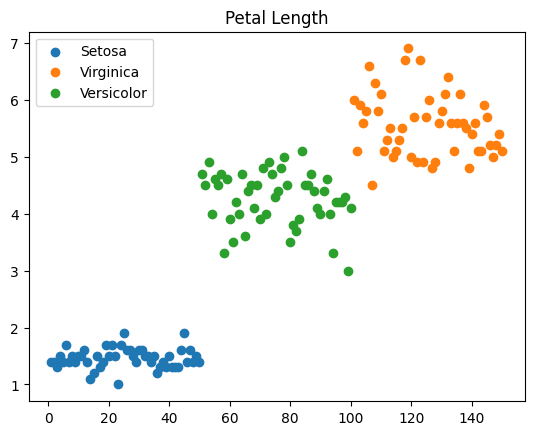

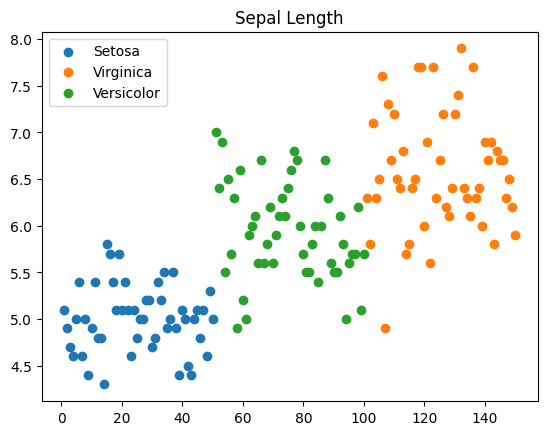

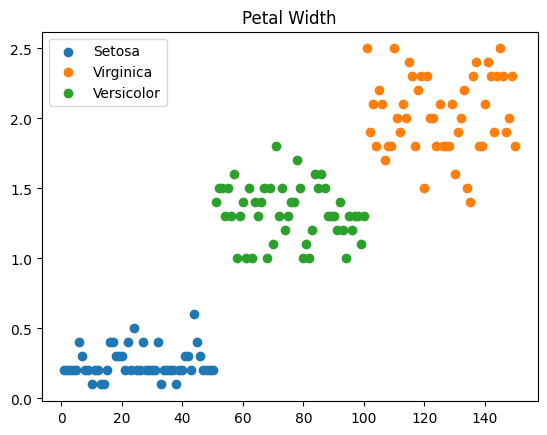

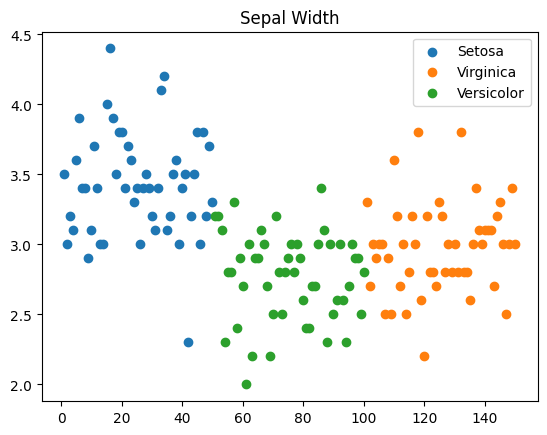

In [350]:
# Plot the data set attributes grouped by classes to visually determine any relations between classes
plot_scatter("Petal Length", "Petal.Length")
plot_scatter("Sepal Length", "Sepal.Length")
plot_scatter("Petal Width", "Petal.Width")
plot_scatter("Sepal Width", "Sepal.Width")

In [351]:
# Petal.Length seems to discretely separate out setosa from other two classes
data.groupby("Species")["Petal.Length"].describe()

,count,mean,std,min,25%,50%,75%,max
Species,,,,,,,,
setosa,50.0,1.462,0.173664,1.0,1.4,1.50,1.575,1.9
versicolor,50.0,4.260,0.469911,3.0,4.0,4.35,4.600,5.1
virginica,50.0,5.552,0.551895,4.5,5.1,5.55,5.875,6.9


Setosa Petal.Length has a min-max (1.0 - 1.9), which clearly distinguishes it from other two classes
Hence, we can make the rule:

    if Petal.Length <= 2.0:
        class = Setosa

And leave the other records unclassified

In [352]:
# Since we cant separate out versicolor and virginica accurately, we find other properties that may be useful

data['Sepal_L_by_W'] = data['Sepal.Length'] / data['Sepal.Width'] # Sepal length by width ratio
data['Petal_L_by_W'] = data['Petal.Length'] / data['Petal.Width'] # Petal length by width ratio

data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Sepal_L_by_W,Petal_L_by_W
1,5.1,3.5,1.4,0.2,setosa,1.457143,7.0
2,4.9,3.0,1.4,0.2,setosa,1.633333,7.0
3,4.7,3.2,1.3,0.2,setosa,1.468750,6.5
4,4.6,3.1,1.5,0.2,setosa,1.483871,7.5
5,5.0,3.6,1.4,0.2,setosa,1.388889,7.0


In [353]:
data.groupby("Species")["Sepal_L_by_W"].describe()

,count,mean,std,min,25%,50%,75%,max
Species,,,,,,,,
setosa,50.0,1.470188,0.118750,1.268293,1.385684,1.463063,1.541444,1.956522
versicolor,50.0,2.160402,0.228658,1.764706,2.033929,2.161290,2.232692,2.818182
virginica,50.0,2.230453,0.246992,1.823529,2.031771,2.169540,2.342949,2.961538


In [354]:
data.groupby("Species")["Petal_L_by_W"].describe()

,count,mean,std,min,25%,50%,75%,max
Species,,,,,,,,
setosa,50.0,6.908000,2.854545,2.666667,4.687500,7.000000,7.500000,15.0
versicolor,50.0,3.242837,0.312456,2.666667,3.016667,3.240385,3.417582,4.1
virginica,50.0,2.780662,0.407367,2.125000,2.511364,2.666667,3.055556,4.0


In [355]:
data['Sepal_by_Petal_L'] = data['Sepal.Length'] / data['Petal.Length'] # Sepal length by petal length ratio
data['Sepal_by_Petal_W'] = data['Sepal.Width'] / data['Petal.Width'] # Sepal width by petal width ratio

data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Sepal_L_by_W,Petal_L_by_W,Sepal_by_Petal_L,Sepal_by_Petal_W
1,5.1,3.5,1.4,0.2,setosa,1.457143,7.0,3.642857,17.5
2,4.9,3.0,1.4,0.2,setosa,1.633333,7.0,3.500000,15.0
3,4.7,3.2,1.3,0.2,setosa,1.468750,6.5,3.615385,16.0
4,4.6,3.1,1.5,0.2,setosa,1.483871,7.5,3.066667,15.5
5,5.0,3.6,1.4,0.2,setosa,1.388889,7.0,3.571429,18.0


In [356]:
data.groupby("Species")["Sepal_by_Petal_L"].describe()

,count,mean,std,min,25%,50%,75%,max
Species,,,,,,,,
setosa,50.0,3.464906,0.430217,2.526316,3.179228,3.414286,3.611538,4.833333
versicolor,50.0,1.400896,0.104565,1.176471,1.333333,1.410603,1.476136,1.700000
virginica,50.0,1.188350,0.062325,1.050000,1.142857,1.177883,1.236096,1.352941


In [357]:
data.groupby("Species")["Sepal_by_Petal_W"].describe()

,count,mean,std,min,25%,50%,75%,max
Species,,,,,,,,
setosa,50.0,16.287000,7.012438,5.833333,11.666667,16.000000,17.500000,41.0
versicolor,50.0,2.112174,0.235913,1.466667,2.000000,2.148352,2.230769,2.7
virginica,50.0,1.483929,0.183393,1.130435,1.369949,1.428571,1.608333,1.9


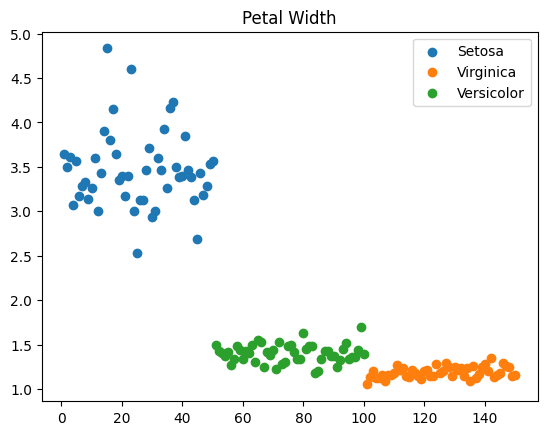

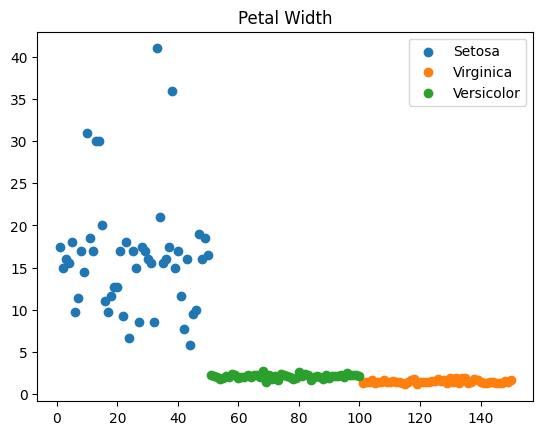

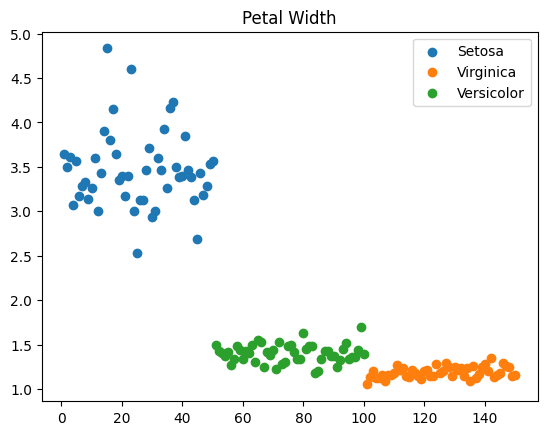

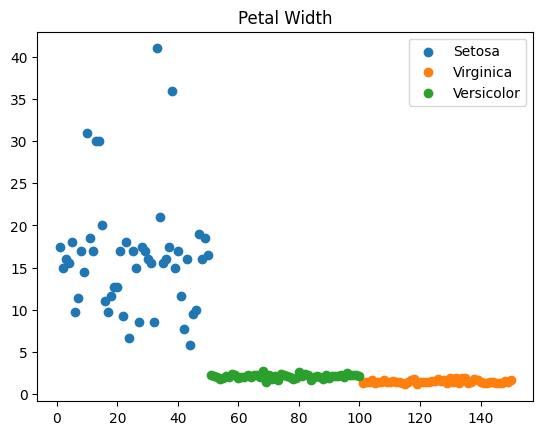

In [358]:
# Draw plots for the new ratio fields
plot_scatter("Petal Width", "Sepal_by_Petal_L")
plot_scatter("Petal Width", "Sepal_by_Petal_W")
plot_scatter("Petal Width", "Sepal_by_Petal_L")
plot_scatter("Petal Width", "Sepal_by_Petal_W")

In [359]:
# Remove the unwanted columns from the frame
unwanted = ["Sepal_L_by_W", "Petal_L_by_W", "Sepal_by_Petal_L", "Sepal_by_Petal_W"]
for column in unwanted:
    data.drop(column, axis=1, inplace=True)

In [360]:
# Since no concrete differences were found, we go ahead with a slighly overlapping feature
data.groupby("Species")["Petal.Width"].describe()

,count,mean,std,min,25%,50%,75%,max
Species,,,,,,,,
setosa,50.0,0.246,0.105386,0.1,0.2,0.2,0.3,0.6
versicolor,50.0,1.326,0.197753,1.0,1.2,1.3,1.5,1.8
virginica,50.0,2.026,0.274650,1.4,1.8,2.0,2.3,2.5


Virginica Petal.Width has a min-max (1.4 - 2.5), which slightly distinguishes it from other two classes
Hence, we can make the rule:

    if Petal.Width >= 1.4:
        class = Virginica

And leave the other records unclassified

In [361]:
data[data["Petal.Width"] >= 1.4]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
51,7.0,3.2,4.7,1.4,versicolor
52,6.4,3.2,4.5,1.5,versicolor
53,6.9,3.1,4.9,1.5,versicolor
55,6.5,2.8,4.6,1.5,versicolor
57,6.3,3.3,4.7,1.6,versicolor
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica
149,6.2,3.4,5.4,2.3,virginica


Versicolor Petal.Length is less than 5.0
Hence, we can make the rule:

    if Petal.Length <= 5.1:
        class = Versicolor

Adding, all the rules, we get:

    if PetalLength <= 2.0:
        return "setosa"
    elif PetalWidth >= 1.4 and PetalLength <= 5.1:
        return "versicolor"
    return "virginica"

In [362]:
def predict(record):
    """
    Purpose: Predict the class for the provided record

    Description of Input Parameters:
    - record: a list of length 4 containing the data points.

    Description of Return Data:
    - class: a string denoting the class of the record

    Libraries Used: None
    """
    SepalLength, SepalWidth, PetalLength, PetalWidth = record[0], record[1], record[2], record[3]
    if PetalLength <= 2.0:
        return "setosa"
    elif PetalWidth >= 1.4 and PetalLength <= 5.1:
        return "versicolor"
    return "virginica"

In [363]:
# Read the csv file and create the data variable
lines = open("../data/iris.csv", "r").read().split("\n")
data = []
for line in lines[1:]:
    if line.replace(" ", "") != "":
        words = line.split(",")
        data.append([float(words[1]), float(words[2]), float(words[3]), float(words[4]), words[5][1:-1]])

In [364]:
# Determine accuracy by dividing the number of correct predictions to the actual values
# Add the incorrect predictions to the unclassified list
count = 0
unclassified = []
for record in data:
    if predict(record[0:-1]) == record[-1]:
        count += 1
    else:
        unclassified.append(record)

print("Accuracy: ", count/150 * 100)

Accuracy:  70.66666666666667


In [365]:
print("unclassified =", unclassified)

unclassified = [[5.5, 2.3, 4.0, 1.3, 'versicolor'], [5.7, 2.8, 4.5, 1.3, 'versicolor'], [4.9, 2.4, 3.3, 1.0, 'versicolor'], [6.6, 2.9, 4.6, 1.3, 'versicolor'], [5.0, 2.0, 3.5, 1.0, 'versicolor'], [6.0, 2.2, 4.0, 1.0, 'versicolor'], [5.6, 2.9, 3.6, 1.3, 'versicolor'], [5.8, 2.7, 4.1, 1.0, 'versicolor'], [5.6, 2.5, 3.9, 1.1, 'versicolor'], [6.1, 2.8, 4.0, 1.3, 'versicolor'], [6.1, 2.8, 4.7, 1.2, 'versicolor'], [6.4, 2.9, 4.3, 1.3, 'versicolor'], [5.7, 2.6, 3.5, 1.0, 'versicolor'], [5.5, 2.4, 3.8, 1.1, 'versicolor'], [5.5, 2.4, 3.7, 1.0, 'versicolor'], [5.8, 2.7, 3.9, 1.2, 'versicolor'], [6.3, 2.3, 4.4, 1.3, 'versicolor'], [5.6, 3.0, 4.1, 1.3, 'versicolor'], [5.5, 2.5, 4.0, 1.3, 'versicolor'], [5.5, 2.6, 4.4, 1.2, 'versicolor'], [5.8, 2.6, 4.0, 1.2, 'versicolor'], [5.0, 2.3, 3.3, 1.0, 'versicolor'], [5.6, 2.7, 4.2, 1.3, 'versicolor'], [5.7, 3.0, 4.2, 1.2, 'versicolor'], [5.7, 2.9, 4.2, 1.3, 'versicolor'], [6.2, 2.9, 4.3, 1.3, 'versicolor'], [5.1, 2.5, 3.0, 1.1, 'versicolor'], [5.7, 2.8, 4

In [366]:
# A simple display of the predict function using a list of data points
test_sets = [["18",5.1,3.5,1.4,0.3,"setosa"], ["56",5.7,2.8,4.5,1.3,"versicolor"], ["106",7.6,3,6.6,2.1,"virginica"]]

for test_set in test_sets:
    print(test_set, "=>", predict(test_set[1:-1]))

['18', 5.1, 3.5, 1.4, 0.3, 'setosa'] => setosa
['56', 5.7, 2.8, 4.5, 1.3, 'versicolor'] => virginica
['106', 7.6, 3, 6.6, 2.1, 'virginica'] => virginica
